In [2]:
import astrosme
import matplotlib.pyplot as plt
import numpy as np

#output images in this notebook
%matplotlib inline

## Catalogue management demo

This notebook demonstrates how the `astrosme.Catalogue()` class can be used to manage catalogues of extragalactic polarization measurements that may be applied to constrain a given SME realization. Simply put, the catalogue object is designed to store the following data:

* Brief descriptions and identifiers of literature references to trace all observations back to their origin.
* Transmission passbands of the instruments used in observations.
* Properties of the observed sources such as coordinates and redshift.
* The measurements themselves, including polarization angles, fractions and drift rates.

To set off, we will create a new empty catalogue. In the future, it is possible to save and open catalogue files, which we will explore later.

In [3]:
my_cat = astrosme.Catalogue()
my_cat.name = 'My first catalogue'
my_cat.description = 'Includes all measurements from Kislat 2018'

For demonstration purposes, we will populate this catalogue with all the measurements used in [Kislat 2018](http://inspirehep.net/record/1709964/files/10.3390_sym10110596.pdf?version=1), summarized in tables A1, A2 and A3 of this paper.

First of all, we will add bibliographic references for the publications, where those measurements were originally presented.

* Table A1 comes entirely from [Sluse+2005](https://ui.adsabs.harvard.edu/abs/2005A%26A...433..757S/abstract) and the corresponding [VizieR table](http://vizier.u-strasbg.fr/viz-bin/VizieR?-source=J/A%2BA/433/757).
* Table A2 originates from a variety of sources. We will merely make a note of it in the interest of time.
* Table A3 is reproduced from [Smith+2009](https://arxiv.org/abs/0912.3621) with redshifts originating from Simbad. We will replace all redshifts with our own Simbad queries that will be cited automatically, so we do not have to worry about the latter.

For each reference, we call `Catalogue().add_reference()`. The method accepts two arguments: the first is a brief machine name of each reference for internal identification. We will stick with `Sluse+2005` for table A1, `Smith+2009` for A3 and `Kislat2018_A2` for A2. The second argument is a detailed description of the reference. Here, we will post links to the original publications and VizieR tables as well as make any additional comments.

In [4]:
my_cat.add_reference('Sluse+2005', 'Table A1. Originally: https://ui.adsabs.harvard.edu/abs/2005A%26A...43'\
                     '3..757S/abstract and http://vizier.u-strasbg.fr/viz-bin/VizieR?-source=J/A%2BA/433/757')
my_cat.add_reference('Kislat2018_A2', 'Table A2 of Kislat 2018. Various origins. Refer to the paper')
my_cat.add_reference('Smith+2009', 'Sources from https://arxiv.org/abs/0912.3621. Spectropolarimetry'\
                     'available through the Steward observatory archive at http://james.as.arizona.edu'\
                     '/~psmith/Fermi/DATA/individual.html')

Now the added references can be accessed as a dictionary within the catalogue object:

In [5]:
my_cat.references

{'Kislat2018_A2': 'Table A2 of Kislat 2018. Various origins. Refer to the paper',
 'Sluse+2005': 'Table A1. Originally: https://ui.adsabs.harvard.edu/abs/2005A%26A...433..757S/abstract and http://vizier.u-strasbg.fr/viz-bin/VizieR?-source=J/A%2BA/433/757',
 'Smith+2009': 'Sources from https://arxiv.org/abs/0912.3621. Spectropolarimetryavailable through the Steward observatory archive at http://james.as.arizona.edu/~psmith/Fermi/DATA/individual.html'}

In principle, we could have edited `my_cat.references` directly; however, `Catalogue().add_reference()` as well as `Catalogue().remove_reference()` carry out additional consistency checks and, as such, it is recommended to use those methods for all additions, removals and edits. The same applies to other data that we will be dealing with in a moment.

## Add sources

Next step: we must add all sources used in tables A1 through A3 to the catalogue. This can be easily accomplished with `Catalogue().add_source()` that accepts only one mandatory argument - the Simbad identifier of the celestial object. In principle, manual input is also available and you can read more about it in the docstring of the method. For now, we will call `Catalogue().add_source()` on every source of interest.

Note that some of the identifiers given in the paper are not Simbad-resolvable (e.g. **SDSS J0242+0049**). Where this is the case, I took the liberty to replace the identifiers with resolvable ones, leaving the original as a comment.

In [6]:
# Table A1
my_cat.add_source('QSO J0242+0049') # SDSS J0242+0049
my_cat.add_source('[VV2006] J031318.7+003623') # FIRST03133+0036
my_cat.add_source('QSO J0809+2753') # FIRST J0809+2753
my_cat.add_source('PG 0946+301')
my_cat.add_source('PKS 1124-186')
my_cat.add_source('He 1127-1304')
my_cat.add_source('[VV2006] J114954.9+001254') # 2QZ J114954+0012
my_cat.add_source('[VV2006] J120627.7+002335') # SDSS J1206+0023
my_cat.add_source('QSO J1214-0001') # SDSS J1214-0001
my_cat.add_source('PKS 1219+04')
my_cat.add_source('PKS 1222+037')
my_cat.add_source('TON 1530')
my_cat.add_source('[VV2006] J123427.8+005758') # SDSS J1234+0057
my_cat.add_source('PG 1254+047')
my_cat.add_source('PKS 1256-229')
my_cat.add_source('QSO J1302-0037') # SDSS J1302-0037
my_cat.add_source('PKS 1303-250')
my_cat.add_source('QSO J1312+2319') # FIRST J1312+2319
my_cat.add_source('QSO J1323-0038') # SDSS J1323-0038
my_cat.add_source('CTS J13.07')
my_cat.add_source('[VV2006] J140918.7+004824') # SDSS J1409+0048
my_cat.add_source('HS 1417+2547')
my_cat.add_source('QSO J1427+2709') # FIRST J1427+2709
my_cat.add_source('QSO J2107-0620') # FIRST J21079-0620
my_cat.add_source('[VV2006] J213139.0-070013') # SDSS J2131-0700
my_cat.add_source('PKS 2204-54')
my_cat.add_source('PKS 2227-445')
my_cat.add_source('PKS 2240-260')
my_cat.add_source('QSO B2301+060') # PKS 2301+06
my_cat.add_source('[VV2006] J231958.7-002449') # SDSS J2319-0024
my_cat.add_source('PKS 2320-035')
my_cat.add_source('PKS 2332-017')
my_cat.add_source('PKS 2335-027')
my_cat.add_source('[VV2006] J235238.1+010551') # SDSS J2352+0105
my_cat.add_source('[VV2006] J235629.0-003601') # SDSS J2356-0036
my_cat.add_source('QSO J2359-12')


# Table A2
my_cat.add_source('GRB 990510')
my_cat.add_source('GRB 990712')
my_cat.add_source('GRB 020813')
my_cat.add_source('GRB 021004')
my_cat.add_source('GRB 030329')
my_cat.add_source('GRB 091018')
my_cat.add_source('GRB 091208B')
my_cat.add_source('GRB 121024A')


# Table A3
my_cat.add_source('3C 454.3')
my_cat.add_source('4C 14.23')
my_cat.add_source('4C 28.07')
my_cat.add_source('QSO B0235+1624') # AO 0235+164
my_cat.add_source('4C 38.41') # B2 1633+382
my_cat.add_source('B2 1846+32A')
my_cat.add_source('B3 0650+453')
my_cat.add_source('B3 1343+451')
my_cat.add_source('6C 073840+545153') # BZU J0742+5444
my_cat.add_source('CTA 26')
my_cat.add_source('CTA 102')
my_cat.add_source('1FHL J1239.6+0443') # MG1 J123931+0443
my_cat.add_source('OJ 248')
my_cat.add_source('PKS 0420-014')
my_cat.add_source('PKS 0454-234')
my_cat.add_source('PKS 0502+049')
my_cat.add_source('PKS 0805-077')
my_cat.add_source('PKS 1118-056')
# PKS 1124-186 has already been accounted for in table A1
my_cat.add_source('PKS 1244-255')
my_cat.add_source('PKS 1441+252')
my_cat.add_source('PKS 1502+106')
my_cat.add_source('PKS 2032+107')
my_cat.add_source('PMN J2345-1555')
my_cat.add_source('S4 1030+61')
my_cat.add_source('3FHL J0844.2+5312') # SDSS J084411+5312
my_cat.add_source('Ton 599');

Now that the sources are loaded, it is possible to display a summary table, listing everything we have been able to obtain from Simbad: coordinates, redshifts, bibliographic references, apparent magnitudes and more:

In [7]:
my_cat.source_summary()

identifier,type,ra,dec,z,z_err,z_bib,b,b_bib,v,v_bib,r,r_bib,i,i_bib
str25,str10,float64,float64,float64,float64,str22,float32,str19,float32,str19,float32,str19,float32,str19
QSO J0242+0049,QSO,40.59114125,0.8201880555555555,2.877704,0.00023099999816622585,2017A&A...597A..79P,18.81,2010A&A...518A..10V,18.48,2010A&A...518A..10V,0.0,False,0.0,False
[VV2006] J031318.7+003623,QSO,48.32777666666666,0.6066402777777777,1.25614,0.0013299999991431832,2009yCat.2294....0A,19.03,2010A&A...518A..10V,18.6,2010A&A...518A..10V,0.0,False,0.0,False
QSO J0809+2753,QSO,122.25563791666666,27.895073333333332,1.508901,0.0003699999942909926,2017A&A...597A..79P,18.17,2010A&A...518A..10V,17.86,2010A&A...518A..10V,0.0,False,0.0,False
QSO J0949+2955,QSO,147.42127833333333,29.922016666666668,1.22066,0.0022899999748915434,2009yCat.2294....0A,16.0,False,16.2,False,0.0,False,0.0,False
QSO B1124-186,QSO,171.76830166666664,-18.954844722222223,1.048,0.010175178018066902,NE/2001AJ....121.2843B,19.17,2008MNRAS.384..775M,0.0,False,19.23,2008ApJS..175...97H,0.0,False
QSO J1130-1320,QSO,172.58314041666665,-13.34729888888889,0.634,0.027527402885882124,NE/2001AJ....121.2843B,16.35,False,18.5,False,16.0,2007AcA....57..227M,0.0,False
[VV2006] J114954.9+001254,QSO,177.4789158333333,0.2153538888888889,1.59733,0.0002699999895412475,2013yCat.5139....0A,18.65,2010A&A...518A..10V,18.44,2010A&A...518A..10V,0.0,False,0.0,False
[VV2006] J120627.7+002335,QSO,181.61511166666665,0.3931630555555556,1.114,0.0031300000846385956,2009yCat.2294....0A,20.48,2010A&A...518A..10V,19.66,2010A&A...518A..10V,0.0,False,0.0,False
QSO J1214-0001,QSO,183.67262583333329,-0.027189166666666667,1.04478,0.0014299999456852674,2009yCat.2294....0A,19.64,2010A&A...518A..10V,19.12,2010A&A...518A..10V,0.0,False,0.0,False


This table can be used for all sorts of visualization purposes. For example, let's plot a histogram of available redshifts to get a feel for how far the sources are from the Milky Way:

Text(0, 0.5, 'Frequency')

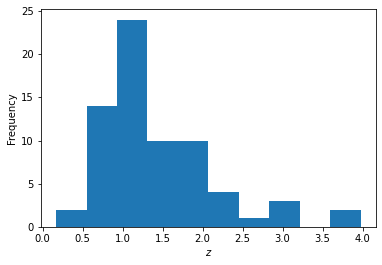

In [8]:
table = my_cat.source_summary()
plt.hist(table['z'], bins = 10);
plt.xlabel('$z$')
plt.ylabel('Frequency')

The library will also quickly plot those sources out on a starchart as demonstrated below. The `Catalogue().source_plot()` function will automatically render a plot of the sources' coordinates in any given projection (Mollweide is the default). It is possible to convert the coordinates to galactic axes and apply conditional colouring/sizing/styling with anonymous functions passed as arguments.

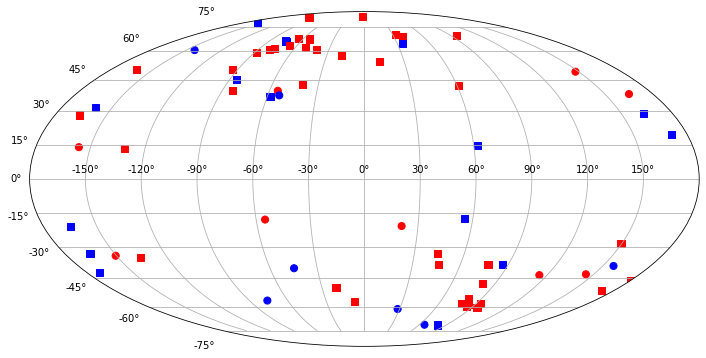

In [9]:
# Colour-code the sources by redshift
def colour_code(source):
    if source['z'] < 1.0:
        # Plot nearby sources in blue
        return 'b'
    else:
        # Plot remote sources in red
        return 'r'

# Plot all quasars as squares
def QSO_as_squares(source):
    if source['type'] == 'QSO':
        return 's'
    else:
        return 'o'

# Render the starchart in galactic coordinates
my_cat.source_plot(galactic = True, color = colour_code, marker = QSO_as_squares);

## Add transmission bands

To constrain SME realizations with broadband polarimetric measurements, one must take into account the exact transmission profile of the instrument. Before adding such measurements, we need to complete the catalogue with the said transmission bands.

In the case of Kislat 2018, all measurements in table A1 were obtained using the EFOSC2 instrument, $V$-band. As of table A2, multiple instruments have been used and are listed in the table accordingly. A3 is a spectropolarimetry table and, therefore, does not require transmission profiles of the instruments.

The transmission profiles of all the instruments of interest are provided in `./filters/` for the purposes of this demo. In the cell below, we load them all using `NumPy` and add them to the catalogue with `Catalogue().add_band()`. Note that for all profiles, the unit of the $x$-axis is $\textrm{nm}$ and the unit of the $y$ axis is the dimensionless transmission fraction between $0$ and $1$.

In [10]:
# Table A1
wl, t = np.loadtxt('filters/EFOSC2-V.dat', delimiter = ',', unpack = True)
my_cat.add_band('EFOSC2-V', wl, t)

# Table A2
wl, t = np.loadtxt('filters/ALFOSC-R.dat', delimiter = ',', unpack = True)
my_cat.add_band('ALFOSC-R', wl, t)
wl, t = np.loadtxt('filters/FORS1-R.dat', delimiter = ',', unpack = True)
my_cat.add_band('FORS1-R', wl, t)
wl, t = np.loadtxt('filters/FORS1-V.dat', delimiter = ',', unpack = True)
my_cat.add_band('FORS1-V', wl, t)
wl, t = np.loadtxt('filters/FORS2-R.dat', delimiter = ',', unpack = True)
my_cat.add_band('FORS2-R', wl, t)
wl, t = np.loadtxt('filters/HOWPol-Rc.dat', delimiter = ',', unpack = True)
my_cat.add_band('HOWPol-Rc', wl, t)

Just like with sources, the library can display a summary table of all loaded instruments, as demonstrated below:

In [11]:
my_cat.band_summary()

name,comment,min_wl,max_wl,FWHM,centre,n
str9,str1,float64,float64,float64,float64,int64
EFOSC2-V,,100.0,1200.0,113.40000000000009,554.588782203372,11001
ALFOSC-R,,100.0,1200.0,124.69999999999993,644.77791429615,11001
FORS1-R,,100.0,1200.0,155.80000000000007,665.1056198332717,11001
FORS1-V,,100.0,1200.0,111.30000000000007,554.2239561644723,11001
FORS2-R,,100.0,1200.0,165.10000000000002,653.8470849404165,11001
HOWPol-Rc,,100.0,1200.0,132.5,654.4203159556179,11001


It is also possible to plot all transmission profiles on the same set of axes for visual clarity:

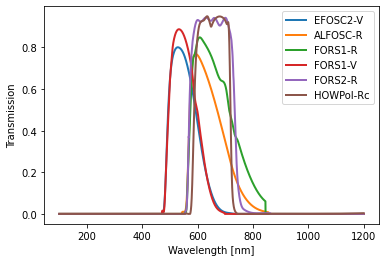

In [12]:
my_cat.band_plot(fig_args = {'figsize': [6, 4]})   # Set the figure size to 6x4 inches (optional)

# Some extra plot features
plt.xlabel('Wavelength [nm]')
plt.ylabel('Transmission')
plt.legend()

## Add measurements

Finally, we have everything in place to start adding polarization measurements. This is done in exactly the same way as before using a special adder function called `Catalogue().add_measurement()`. Each measurement is linked to a reference and a source added above. Additionally, broadband measurements are linked to instrument transmission profiles.

In [13]:
# Clear all measurements to avoid adding them twice if this cell reruns
my_cat.measurements = {}

# Table A1
my_cat.add_measurement('QSO J0242+0049', 'Sluse+2005', 'broadband', {'pol': 1.47 * 0.01, 'e_pol': 0.24 * 0.01, 'psi': -13.0, 'band': 'EFOSC2-V'})
my_cat.add_measurement('[VV2006] J031318.7+003623', 'Sluse+2005', 'broadband', {'pol': 1.48 * 0.01, 'e_pol': 0.29 * 0.01, 'psi': -55.0, 'band': 'EFOSC2-V'})
my_cat.add_measurement('QSO J0809+2753', 'Sluse+2005', 'broadband', {'pol': 1.75 * 0.01, 'e_pol': 0.2 * 0.01, 'psi': 73.0, 'band': 'EFOSC2-V'})
my_cat.add_measurement('QSO J0949+2955', 'Sluse+2005', 'broadband', {'pol': 1.65 * 0.01, 'e_pol': 0.19 * 0.01, 'psi': -66.0, 'band': 'EFOSC2-V'})
my_cat.add_measurement('QSO B1124-186', 'Sluse+2005', 'broadband', {'pol': 11.68 * 0.01, 'e_pol': 0.36 * 0.01, 'psi': 37.0, 'band': 'EFOSC2-V'})
my_cat.add_measurement('QSO J1130-1320', 'Sluse+2005', 'broadband', {'pol': 1.32 * 0.01, 'e_pol': 0.13 * 0.01, 'psi': 46.0, 'band': 'EFOSC2-V'})
my_cat.add_measurement('[VV2006] J114954.9+001254', 'Sluse+2005', 'broadband', {'pol': 1.57 * 0.01, 'e_pol': 0.22 * 0.01, 'psi': -24.0, 'band': 'EFOSC2-V'})
my_cat.add_measurement('[VV2006] J120627.7+002335', 'Sluse+2005', 'broadband', {'pol': 0.94 * 0.01, 'e_pol': 0.15 * 0.01, 'psi': -57.0, 'band': 'EFOSC2-V'})
my_cat.add_measurement('QSO J1214-0001', 'Sluse+2005', 'broadband', {'pol': 2.4 * 0.01, 'e_pol': 0.32 * 0.01, 'psi': -77.0, 'band': 'EFOSC2-V'})
my_cat.add_measurement('4C 04.42', 'Sluse+2005', 'broadband', {'pol': 5.56 * 0.01, 'e_pol': 0.15 * 0.01, 'psi': -61.0, 'band': 'EFOSC2-V'})
my_cat.add_measurement('4C 03.23', 'Sluse+2005', 'broadband', {'pol': 2.51 * 0.01, 'e_pol': 0.22 * 0.01, 'psi': -82.0, 'band': 'EFOSC2-V'})
my_cat.add_measurement('Ton  1530', 'Sluse+2005', 'broadband', {'pol': 0.92 * 0.01, 'e_pol': 0.14 * 0.01, 'psi': -11.0, 'band': 'EFOSC2-V'})
my_cat.add_measurement('[VV2006] J123427.8+005758', 'Sluse+2005', 'broadband', {'pol': 1.35 * 0.01, 'e_pol': 0.23 * 0.01, 'psi': 2.0, 'band': 'EFOSC2-V'})
my_cat.add_measurement('QSO B1254+0443', 'Sluse+2005', 'broadband', {'pol': 0.84 * 0.01, 'e_pol': 0.15 * 0.01, 'psi': -4.0, 'band': 'EFOSC2-V'})
my_cat.add_measurement('QSO B1256-229', 'Sluse+2005', 'broadband', {'pol': 22.32 * 0.01, 'e_pol': 0.15 * 0.01, 'psi': -23.0, 'band': 'EFOSC2-V'})
my_cat.add_measurement('QSO J1302-0037', 'Sluse+2005', 'broadband', {'pol': 1.37 * 0.01, 'e_pol': 0.2 * 0.01, 'psi': 35.0, 'band': 'EFOSC2-V'})
my_cat.add_measurement('2MASS J13061539-2517203', 'Sluse+2005', 'broadband', {'pol': 0.91 * 0.01, 'e_pol': 0.17 * 0.01, 'psi': -75.0, 'band': 'EFOSC2-V'})
my_cat.add_measurement('QSO J1312+2319', 'Sluse+2005', 'broadband', {'pol': 1.1 * 0.01, 'e_pol': 0.16 * 0.01, 'psi': -14.0, 'band': 'EFOSC2-V'})
my_cat.add_measurement('QSO J1323-0038', 'Sluse+2005', 'broadband', {'pol': 1.13 * 0.01, 'e_pol': 0.21 * 0.01, 'psi': 15.0, 'band': 'EFOSC2-V'})
my_cat.add_measurement('[VV96] J134204.4-181801', 'Sluse+2005', 'broadband', {'pol': 0.83 * 0.01, 'e_pol': 0.15 * 0.01, 'psi': 20.0, 'band': 'EFOSC2-V'})
my_cat.add_measurement('[VV2006] J140918.7+004824', 'Sluse+2005', 'broadband', {'pol': 3.91 * 0.01, 'e_pol': 0.28 * 0.01, 'psi': 30.0, 'band': 'EFOSC2-V'})
my_cat.add_measurement('[VV2000] J142013.1+253404', 'Sluse+2005', 'broadband', {'pol': 1.03 * 0.01, 'e_pol': 0.18 * 0.01, 'psi': -66.0, 'band': 'EFOSC2-V'})
my_cat.add_measurement('QSO J1427+2709', 'Sluse+2005', 'broadband', {'pol': 1.35 * 0.01, 'e_pol': 0.25 * 0.01, 'psi': 80.0, 'band': 'EFOSC2-V'})
my_cat.add_measurement('QSO J2107-0620', 'Sluse+2005', 'broadband', {'pol': 1.12 * 0.01, 'e_pol': 0.22 * 0.01, 'psi': -33.0, 'band': 'EFOSC2-V'})
my_cat.add_measurement('[VV2006] J213139.0-070013', 'Sluse+2005', 'broadband', {'pol': 1.78 * 0.01, 'e_pol': 0.32 * 0.01, 'psi': 44.0, 'band': 'EFOSC2-V'})
my_cat.add_measurement('QSO B2204-54', 'Sluse+2005', 'broadband', {'pol': 1.81 * 0.01, 'e_pol': 0.26 * 0.01, 'psi': -50.0, 'band': 'EFOSC2-V'})
my_cat.add_measurement('QSO B2227-445', 'Sluse+2005', 'broadband', {'pol': 5.26 * 0.01, 'e_pol': 0.48 * 0.01, 'psi': 18.0, 'band': 'EFOSC2-V'})
my_cat.add_measurement('QSO B2240-260', 'Sluse+2005', 'broadband', {'pol': 14.78 * 0.01, 'e_pol': 0.21 * 0.01, 'psi': -49.0, 'band': 'EFOSC2-V'})
my_cat.add_measurement('QSO B2301+060', 'Sluse+2005', 'broadband', {'pol': 3.69 * 0.01, 'e_pol': 0.26 * 0.01, 'psi': -17.0, 'band': 'EFOSC2-V'})
my_cat.add_measurement('[VV2006] J231958.7-002449', 'Sluse+2005', 'broadband', {'pol': 1.85 * 0.01, 'e_pol': 0.3 * 0.01, 'psi': -16.0, 'band': 'EFOSC2-V'})
my_cat.add_measurement('QSO B2320-035', 'Sluse+2005', 'broadband', {'pol': 9.56 * 0.01, 'e_pol': 0.2 * 0.01, 'psi': 90.0, 'band': 'EFOSC2-V'})
my_cat.add_measurement('QSO B2332-017', 'Sluse+2005', 'broadband', {'pol': 4.86 * 0.01, 'e_pol': 0.19 * 0.01, 'psi': -88.0, 'band': 'EFOSC2-V'})
my_cat.add_measurement('QSO B2335-027', 'Sluse+2005', 'broadband', {'pol': 3.55 * 0.01, 'e_pol': 0.3 * 0.01, 'psi': -70.0, 'band': 'EFOSC2-V'})
my_cat.add_measurement('[VV2006] J235238.1+010551', 'Sluse+2005', 'broadband', {'pol': 1.59 * 0.01, 'e_pol': 0.26 * 0.01, 'psi': 27.0, 'band': 'EFOSC2-V'})
my_cat.add_measurement('[VV2006] J235629.0-003601', 'Sluse+2005', 'broadband', {'pol': 1.81 * 0.01, 'e_pol': 0.34 * 0.01, 'psi': 16.0, 'band': 'EFOSC2-V'})
my_cat.add_measurement('QSO J2359-1241', 'Sluse+2005', 'broadband', {'pol': 4.12 * 0.01, 'e_pol': 0.2 * 0.01, 'psi': -29.0, 'band': 'EFOSC2-V'})

# Table A2
my_cat.add_measurement('GRB 990510', 'Kislat2018_A2', 'broadband', {'pol': 1.6 * 0.01, 'e_pol': 0.2 * 0.01, 'psi': -84.0, 'band': 'FORS1-R'})
my_cat.add_measurement('GRB 990712', 'Kislat2018_A2', 'broadband', {'pol': 2.9 * 0.01, 'e_pol': 0.4 * 0.01, 'psi': -59.0, 'band': 'FORS1-R'})
my_cat.add_measurement('GRB 020813A', 'Kislat2018_A2', 'broadband', {'pol': 1.42 * 0.01, 'e_pol': 0.25 * 0.01, 'psi': -43.0, 'band': 'FORS1-V'})
my_cat.add_measurement('GRB 021004', 'Kislat2018_A2', 'broadband', {'pol': 2.1 * 0.01, 'e_pol': 0.6 * 0.01, 'psi': -7.0, 'band': 'ALFOSC-R'})
my_cat.add_measurement('SN 2003dh', 'Kislat2018_A2', 'broadband', {'pol': 2.4 * 0.01, 'e_pol': 0.4 * 0.01, 'psi': 65.0, 'band': 'ALFOSC-R'})
my_cat.add_measurement('GRB 091018', 'Kislat2018_A2', 'broadband', {'pol': 3.25 * 0.01, 'e_pol': 0.35 * 0.01, 'psi': 57.0, 'band': 'FORS2-R'})
my_cat.add_measurement('GRB 091208B', 'Kislat2018_A2', 'broadband', {'pol': 10.4 * 0.01, 'e_pol': 2.5 * 0.01, 'psi': -88.0, 'band': 'HOWPol-Rc'})
my_cat.add_measurement('GRB 121024A', 'Kislat2018_A2', 'broadband', {'pol': 4.83 * 0.01, 'e_pol': 0.2 * 0.01, 'psi': -7.0, 'band': 'FORS2-R'})

# Table A3
my_cat.add_measurement('3C 454.3', 'Smith+2009', 'spectropolarimetry', {'psi': 61.19, 'rho': -0.3, 'e_rho': 0.1, 'E': 2.26})
my_cat.add_measurement('4C 14.23', 'Smith+2009', 'spectropolarimetry', {'psi': -34.42, 'rho': -0.7, 'e_rho': 0.7, 'E': 2.26})
my_cat.add_measurement('4C 28.07', 'Smith+2009', 'spectropolarimetry', {'psi': -62.36, 'rho': 0.46, 'e_rho': 0.32, 'E': 2.26})
my_cat.add_measurement('QSO B0235+1624', 'Smith+2009', 'spectropolarimetry', {'psi': -20.25, 'rho': 0.16, 'e_rho': 0.17, 'E': 2.26})
my_cat.add_measurement('4C 38.41', 'Smith+2009', 'spectropolarimetry', {'psi': -3.71, 'rho': -0.69, 'e_rho': 0.26, 'E': 2.26})
my_cat.add_measurement('QSO J1848+3219', 'Smith+2009', 'spectropolarimetry', {'psi': 2.39, 'rho': 1.49, 'e_rho': 0.18, 'E': 2.26})
my_cat.add_measurement('7C 065044.10+451813.00', 'Smith+2009', 'spectropolarimetry', {'psi': 79.3, 'rho': 3.4, 'e_rho': 0.18, 'E': 2.26})
my_cat.add_measurement('7C 134328.69+450758.00', 'Smith+2009', 'spectropolarimetry', {'psi': 35.6, 'rho': -0.7, 'e_rho': 0.26, 'E': 2.26})
my_cat.add_measurement('6C 073840+545153', 'Smith+2009', 'spectropolarimetry', {'psi': -87.84, 'rho': 2.2, 'e_rho': 0.6, 'E': 2.26})
my_cat.add_measurement('QSO B0336-0156', 'Smith+2009', 'spectropolarimetry', {'psi': 67.49, 'rho': -0.13, 'e_rho': 0.24, 'E': 2.26})
my_cat.add_measurement('4C 11.69', 'Smith+2009', 'spectropolarimetry', {'psi': 64.81, 'rho': 1.29, 'e_rho': 0.34, 'E': 2.26})
my_cat.add_measurement('[VV2006] J123932.7+044305', 'Smith+2009', 'spectropolarimetry', {'psi': -72.28, 'rho': -0.02, 'e_rho': 0.32, 'E': 2.26})
my_cat.add_measurement('7C 082754.29+242103.00', 'Smith+2009', 'spectropolarimetry', {'psi': -79.23, 'rho': -0.9, 'e_rho': 0.4, 'E': 2.26})
my_cat.add_measurement('QSO B0420-0127', 'Smith+2009', 'spectropolarimetry', {'psi': 10.23, 'rho': 0.44, 'e_rho': 0.31, 'E': 2.26})
my_cat.add_measurement('QSO J0457-2324', 'Smith+2009', 'spectropolarimetry', {'psi': 2.49, 'rho': 0.22, 'e_rho': 0.2, 'E': 2.26})
my_cat.add_measurement('QSO B0502+049', 'Smith+2009', 'spectropolarimetry', {'psi': -87.82, 'rho': 2.1, 'e_rho': 0.5, 'E': 2.26})
my_cat.add_measurement('QSO B0805-077', 'Smith+2009', 'spectropolarimetry', {'psi': 41.7, 'rho': -1.4, 'e_rho': 0.11, 'E': 2.26})
my_cat.add_measurement('[VV98] J112125.1-055356', 'Smith+2009', 'spectropolarimetry', {'psi': 37.26, 'rho': 1.4, 'e_rho': 0.7, 'E': 2.26})
my_cat.add_measurement('QSO B1124-186', 'Smith+2009', 'spectropolarimetry', {'psi': -83.18, 'rho': 0.2, 'e_rho': 0.7, 'E': 2.26})
my_cat.add_measurement('QSO J1246-2547', 'Smith+2009', 'spectropolarimetry', {'psi': -14.07, 'rho': 1.9, 'e_rho': 0.4, 'E': 2.26})
my_cat.add_measurement('7C 1441+2514', 'Smith+2009', 'spectropolarimetry', {'psi': -72.34, 'rho': 0.51, 'e_rho': 0.28, 'E': 2.26})
my_cat.add_measurement('QSO B1502+1041', 'Smith+2009', 'spectropolarimetry', {'psi': 65.43, 'rho': 0.1, 'e_rho': 0.4, 'E': 2.26})
my_cat.add_measurement('QSO B2032+107', 'Smith+2009', 'spectropolarimetry', {'psi': 68.4, 'rho': 9.2, 'e_rho': 0.34, 'E': 2.26})
my_cat.add_measurement('ICRF J234512.4-155507', 'Smith+2009', 'spectropolarimetry', {'psi': -0.46, 'rho': 1.3, 'e_rho': 0.15, 'E': 2.26})
my_cat.add_measurement('ICRF J103351.4+605107', 'Smith+2009', 'spectropolarimetry', {'psi': -59.69, 'rho': -1.3, 'e_rho': 0.4, 'E': 2.26})
my_cat.add_measurement('87GB 084028.4+532346', 'Smith+2009', 'spectropolarimetry', {'psi': 8.4, 'rho': -2.0, 'e_rho': 0.17, 'E': 2.26})
my_cat.add_measurement('Ton  599', 'Smith+2009', 'spectropolarimetry', {'psi': -52.69, 'rho': 0.86, 'e_rho': 0.26, 'E': 2.26});

`Catalogue().measurement_table()` can return required properties of given measurements or their parent sources as parallel vectors. Below, we illustrate this feature by plotting the polarization drift of all spectropolarimetry measurements versus redshift.

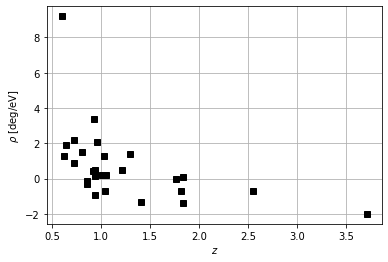

In [14]:
# A function to select spectropolarimetric measurements only
def spectropolarimetry_only(measurement, type, source, reference):
    return type == 'spectropolarimetry'

vectors = my_cat.measurement_table(['z', 'rho'], query = spectropolarimetry_only)

# Plotting
plt.plot(vectors['z'], vectors['rho'], 'ks')
plt.xlabel('$z$')
plt.ylabel(r'$\rho$ [deg/eV]')
plt.grid()

## Saving and loading

The catalogue is now complete. We can save it on the hard drive with `Catalogue().save()` as follows:

In [15]:
my_cat.save('catalogues/kislat_2018.pkl')

We can now load the saved catalogue and verify that the loaded copy is identical to the original. A saved catalogue may be loaded into a blank `Catalogue()` object with `Catalogue().load()` or by passing the filename directly to the constructor, as we will do below:

In [16]:
loaded_cat = astrosme.Catalogue('catalogues/kislat_2018.pkl')

print('Loaded {}'.format(loaded_cat.name))
print(loaded_cat == my_cat)

Loaded My first catalogue
True
